Lecture 15 is an example exam.

# Question 1. Strings and files (6p)

The ultimate goal is to convert a color image file to a greyscale image file.

### Part A: 1 point

Colors are often defined by red green and blue color channels. 
One can compute the luminance (greyscale value) with:
$$
luminance = 0.2126\; R + 0.7152\; G + 0.0722\; B
$$

Write a function to converts integer red green and blue color values to integer greyscale.
Example usage
```python
>>> print(luminance(red=40, green=200, blue=130))
161
```

##### Solution proposal:

In [7]:
def luminance(red, green, blue):
    return round(0.2126 * red + 0.7152 * green + 0.0722 * blue)

### Part B: 5 points

The PPM image format (file.ppm) is a simple text based image format 
```bash
P3
# The P3 means colors are in ASCII, then 3 columns and 2 rows,
# then 255 for max color, then RGB triplets
3 2
255
103 217 103    43  95 181   219 219 219
244  83 106   255 255 255     0  83 106
```
The lines starting with `#` are commented (ignored).
The first characters `P3` denote the file format, and these are followd by the size (width and height). The next number denotes the maximum value of the channels (in this case, 0 to 255).
The rest is the values of the colors, pixel by pixel (in this case, R=103, G=217, B=103 for the first pixel)

Linebreaks are optional; any whitespace seperator works. This is also a valid PPM file:
```bash
P3
3 2
255
103 217 103 43 95 181 219 219 219 244 83 106 255 255
255 0 83 106
```


The PGM image format looks very similar, but has only 1 channel per pixel (the luminance / greyscale)
```bash
P2
# Greyscale version
3 2
255
185 90 219
119 255 67
```

##### Solution proposal:

In [22]:
def read_ppm(filename):
    with open(filename) as f:
        data = []
        for line in f:
            if line.startswith("#"):  # Ignore comments
                continue
            for word in line.strip().split():
                data.append(int(word))

    size_x = data[0]
    size_y = data[1]
    max_val = data[2]
    data = data[3:]
    return size_x, size_y, max_val, data

def write_pgm(filename, data, max_val, size_x, size_y):
    with open(filename, "w") as f:
        f.write("P2\n")
        f.write("# Greyscale version\n")
        f.write(str(size_x) + " " + str(size_y) + "\n")
        f.write(str(max_val) + "\n")
        for illum in data:
            f.write(str(illum) + "\n")

def ppm2pgm(filename):
    size_x, size_y, max_val, data = read_ppm(filename)

    grays = []
    n_pixels = size_x * size_y
    for i in range(0, 3 * n_pixels, 3):
        R = data[i]
        G = data[i + 1]
        B = data[i + 2]
        grays.append(luminance(R, G, B))

    write_pgm(filename[:-4] + ".pgm", grays, max_val, size_x, size_y)

# Question 2. Numpy  (5p)

Hastigheten för en kropp (initialt i vila) längs ett lutande plan i en viskös vätska kan skrivas som:

$$ v(t) = \frac{m  g}{\eta}  \sin(\theta) \times \left(1 - \exp(- \frac{\eta}{m} t) \right) $$

Här är:
- $m$ massan för kroppen
- $g$ gravitationsaccelerationen
- $\theta$ lutningen på planet räknat från horisontalplanet
- $\eta$ viskositeten hos vätskan


I vårt exempel ska följande värden användas: $m$ = 1 kg, $g$ = 9.81 m/s², $\theta$ = 60°, $\eta$ = 0.05 kg/s

I denna uppgift _skall_ NumPy, SciPy och Matplotlib användas!

a) Vid vilken tidpunkt har kroppen uppnått hastigheten v = v1 = 100 m/s?
Tips: använd lämplig rutin från SciPY för att lösa ekvationen v(t) - v1 = 0

b) Använd matplotlib för att plotta v(t) och lösningen till a)

c) Använd resultatet från b) för att uppskatta sluthastigheten (terminal velocity) för kroppen

##### Solution proposal:

V is 100 at time 17.760499212265167 (check: 99.99999999999946)


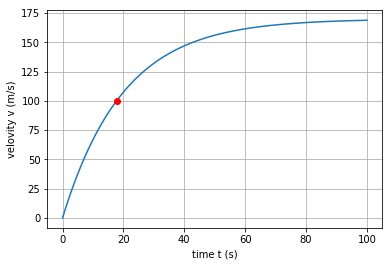

Terminal velocity: 169.914184223


In [23]:
import numpy as np
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt

# Define constants
g = 9.81
theta = 60 * math.pi / 180
m = 1
eta = 0.05

# Part A, find the time when v = 100 m/s
v1 = 100
vf = lambda t : m * g * math.sin(theta) / eta * (1 - np.exp(- eta / m * t)) - v1

t_solve = fsolve(vf, x0 = 0.0)
ts = t_solve[0]

print('V is {} at time {} (check: {})'.format(v1, ts, v1+vf(ts)))


# Part B
t = np.linspace(0, 100, 1000)

v = v1 + vf(t)

plt.plot(t, v)
plt.plot(ts, v1, 'ro')
plt.grid()
plt.xlabel('time t (s)')
plt.ylabel('velovity v (m/s)')
plt.show()

# Part c, terminal velocity
# See graph

vt = v1 + vf(ts*1000)
print('Terminal velocity:', vt)

# Question 3. Designing some class (6p)


A common type matrix pattern is of matrix has the form:
$$
A = \begin{pmatrix} K & G \\ G^T & 0 \end{pmatrix}
$$
where the $K$ matrix is the main system of equations for some problem, and the $G$ matrix is a set of additional constraints on the system.

Part A (4p)
-------
Write a class `ConstrainedMatrix` which takes references to a matrix `k` and a matrix `g` and represents the $A$ matrix described above.
We wish to save memory here, so do not store any unnecessary copies of the matrices.

Implement:

 * the method `size()` which returns a tuple of the total matrix size.
 * the method `dot_product(x)` which takes a vector $x$ and returns the dot product $A \cdot x$.

The sub-matrices `k` and `g` and the vector `x` must be numpy arrays. The return value from the dot product should be a numpy array as well.
 
The dot product (skalärprodukt) is computed by:
$$
\begin{aligned}
M \cdot x &= \sum_j M_{ij} x_j \\
M^T \cdot x &= \sum_j M_{ji} x_j
\end{aligned}
$$

In `dot_product`, make use the fact that
$$
\begin{aligned}
A \cdot x = \begin{pmatrix} K & G \\ G^T & 0 \end{pmatrix} \cdot \begin{pmatrix} x_k \\ x_g \end{pmatrix} = \begin{pmatrix} K \cdot x_k + G \cdot x_g \\ G^T \cdot x_k \end{pmatrix}
\end{aligned}
$$

*Hint: You can determine the shape of a numpy array by using `k.shape` which is a tuple with the sizes.*

Part B (2p)
-----------
Write a custom exception `MatrixSizeMismatch`. Have the initialization of `ConstrainedMatrix` return this error with an informative error message if `k` and `g` doesn't have the same number of rows.
**Also** write a simple test code that catches the exception.


Example:
```python
k = np.array([[1,2,3],[4,5,6],[7,8,9]])
g = np.array([[1,0],[0,-1],[-1,1]])
x = np.array([1,0,2,3,0])

a = ConstrainedMatrix(k, g)
v = a.dot_product(x) 
print(v) # should be [10, 16, 22, -1, 2]
```

##### Solution proposal:

In [24]:
class MatrixSizeMismatch(Exception):
    pass

class ConstrainedMatrix:
    def __init__(self, k, g):
        if k.shape[1] != g.shape[0] or k.shape[0] != g.shape[0]:
            raise MatrixSizeMismatch("Incompatible matrices: k = {}x{} but g has {} rows".format(*k.shape, g.shape[0]))

        self.k = k
        self.g = g

    def size(self):
        rows = k.shape[0] + g.shape[1]
        cols = k.shape[1] + g.shape[1]
        return (rows, cols)

    def dot_product(self, x):
        pos = k.shape[1]
        # It would be find to implement as a nested loop as well:
        v_k = np.dot(self.k, x[:pos]) + np.dot(self.g, x[pos:])
        v_g = np.dot(x[:pos], self.g)
        return np.concatenate((v_k, v_g))

In [25]:
# Small random test case:

k = np.array([[1,2,3],[4,5,6],[7,8,9]])
g = np.array([[1,0],[0,-1],[-1,1]])
x = np.array([1,0,2,3,0])

a = ConstrainedMatrix(k, g)
v = a.dot_product(x) 
print(v) # should be [10, 16, 22, -1, 2]

# This should raise an exception:
k2 = np.array([[1,2],[3,4],[5,6]])
try:
    b = ConstrainedMatrix(k2, g)
except MatrixSizeMismatch:
    print("doh")

[10 16 22 -1  2]
doh


# Question 4. Designing a class hierarchy (8p)

Do not use any NumPy or SciPy for this question. You will need the `math` library for `sqrt`.

Vectors are critical part of almost any software. In many applications, we can use OOP to make special versions of vectors for practical and performance reasons. 

Part A (0.5p)
-------------

Write a base class `BaseVector` with an abstract method `norm()`.

The `norm` is computed by $\sqrt{\sum_i a_i^2}$

Part B (1p)
-----------

Write the (trivial) subclass `ZeroVector` (a vector of all zeros) that takes a length, and nothing else.
Add suitable implementations to the `len` operator, and the `norm` and `x[i]` (getitem) methods.
`x[i]` should raise an `IndexError` if `i` is outside of the size.

```python
>>> x = ZeroVector(10)
>>> print(x.norm())
0
>>> print(x[5])
0
>>> x[15]
...
IndexError: bla bla bla
```

*Hint: `len` support through `__len__(self)`*

*Hint: `x[item]` support through `__getitem__(self, item)`*


Part C (2p)
-----------

Write a subclass `Vector` that is a ordinary vector using a `list` to store its values.
Add the implementations to the `len` operator the `norm` and `x[i]` (getitem) methods.

```python
>>> x = Vector([3, 2, 6, 4, 2, 8])
>>> y = Vector([2, 7, 1, 1, 4, 3])
>>> print(x.norm())
11.533
```


Part D (3p)
-----------

Write a subclass `VectorSlice` that takes a `Vector` and a sub-range (slice) **without copying** any data from original `Vector`.
Instead it simple stores a reference to the original, and uses the range to determine what part of the vector to represent.

Add the implementations to the `len` operator, the `norm` and `x[i]` (getitem) methods.
`x[i]` should raise an `IndexError` if `i` is outside the slice range.

```python
>>> x = Vector([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
>>> y = VectorSlice(x, 3, 6)  # will represent [7, 9, 11]
>>> print(y.norm())
15.843
>>> print(y[1])
9
```


Part E (1.5p)
-------------

Add a new method `slice(a, b)` to all three classes `Vector`, `VectorSlice`, `ZeroVector` and a corrsponding abstract method in `BaseVector`.
Make use of the `VectorSlice` class where it is suitable.

```python
>>> x = Vector([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
>>> y = x.slice(2, 7) # y will contain values 2, 3, 4, 5, 6
>>> z = y.slice(3, 5) # z will contain values 5, 6
>>> u = ZeroVector(10)
>>> v = u.slice(2, 5) # v will contain only zeroes length
```

*Hint: The zero vector is a bit special! The `slice` method does not have to return a `VectorSlice` type.*

*Hint: A slice of a slice is still just a slice.*

##### Solution proposal:

In [14]:
from math import sqrt
import abc

class BaseVector(metaclass=abc.ABCMeta):
    @abc.abstractmethod
    def norm(self):
        pass

    @abc.abstractmethod
    def slice(self, start, end):
        pass


class ZeroVector(BaseVector):
    def __init__(self, size):
        self.size = size

    def __len__(self):
        return self.size

    def __getitem__(self, item):
        if item < 0 or item > self.size:
            raise IndexError("Index {} outside range for size {}".format(item, len(self)))
        return 0.

    def norm(self):
        return 0.

    def slice(self, start, end):
        return ZeroVector(end - start)


class Vector(BaseVector):
    def __init__(self, values):
        self.values = values

    def __len__(self):
        return len(self.values)

    def __getitem__(self, item):
        return self.values[item]

    def norm(self):
        x = 0.
        for v in self.values:
            x += v*v
        return sqrt(x)

    def slice(self, start, end):
        # Optional:
        if start > len(self) or end > len(self):
            raise IndexError("Slice index {},{} outside range".format(start, end) )
        return VectorSlice(self, start, end)


class VectorSlice(BaseVector):
    def __init__(self, vector, start, end):
        self.values = vector
        self.start = start
        self.end = end

    def __len__(self):
        return self.end - self.start

    def __getitem__(self, item):
        if item < 0 or item > len(self):
            raise IndexError("Index {} outside range for size {}".format(item, len(self)))
        return self.vector[self.start + item]

    def norm(self):
        x = 0.
        for i in range(self.start, self.end):
            x += self.vector[i] ** 2
        return sqrt(x)

    def slice(self, start, end):
        # Optional:
        if start > len(self) or end > len(self):
            raise IndexError("Slice index {},{} outside range".format(start, end) )
        return VectorSlice(self.vector, self.start + start, self.start + end)